# Mitschrift SW09

## Anova - One-Way


P-Wert: 
- Ein wahrscheinlichkeit (Wert zwischen 0 und 1)
- Wahrscheinlichkeit, unter der Annahme, dass die Nullhypothese stimmt. 

In [1]:
from pandas import DataFrame 
import scipy.stats as st 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
rf = DataFrame({
    "HC": np.repeat(["5%", "10%", "15%", "20%"], [6, 6, 6, 6]), 
    "Strength":[7, 8, 15, 11, 9, 10, 12, 17, 13, 18, 19, 15, 14, 18, 19, 17, 
    16, 18, 19, 25, 22, 23, 18, 20]
})

per5 = rf.loc[rf["HC"]=="5%", "Strength"] 
per10 = rf.loc[rf["HC"]=="10%", "Strength"] 
per15 = rf.loc[rf["HC"]=="15%", "Strength"] 
per20 = rf.loc[rf["HC"]=="20%", "Strength"]

print(st.ttest_ind(per10,per20))


TtestResult(statistic=np.float64(-3.4979930040209894), pvalue=np.float64(0.005745740170742539), df=np.float64(10.0))


### Bsp Hartholz Einkaufstaschen

4 Gruppen: 5%, 10%, 15%, 20%        
i ∈ {1,2,3,4}

| yᵢⱼ | 1 | 2 | 3 | 4 |
|:------|:---------:|-------:|-------:|-------:| 
| 1    | ...        | ...     |...        | ...     |        
| 2    | ...        | ...     |...        | ...     |      
| 3    | ...        | ...     |...        | ...     |      
| 4    | ...        | ...     |...        | ...     |      

μ̂₁ Schätzung von μ₁     
μ̂₂ Schätzung von μ₂     
μ̂₃ Schätzung von μ₃         
μ̂₄ Schätzung von μ₄             

μ₁ = 11         Niveau 1, definiere $\tau_1$ = μ₁ - μ     
μ₂ = 16         Niveau 2, definiere $\tau_2$ = μ₂ - μ     
μ₃ = 17         Niveau 3, definiere $\tau_3$ = μ₃ - μ     
μ₄ = 21         Niveau 4, definiere $\tau_4$ = μ₄ - μ         

--> μᵢ = μ + Tᵢ


Problem: μ ist beliebig wählbar. 
Je nach wahl von $mu$, hat man verschiedene Konventionen (vereinbarungen) --> verschiedene Parametrisierungen
Zwei häufige parametrisierungen:         
#
$\mu$ = $\mu_1$ $\tau_1$ = 0, nebenbedingung: $\tau_2 = \mu_2 - \mu_1 = 5$ ... usw...  Gruppe 1 (Baseline)

$\mu = \hat{\mu_1} = 1/4 \sum_{i=1}^4 \mu_i = 16.125$ --> $\sum \tau_i = 0$ und $\tau_i = \mu_i - \mu$
 

# Anova 1

In [3]:
from pandas import DataFrame 
import pandas as pd
import numpy as np
import scipy.stats as st

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

rf = DataFrame({
    "HC": np.repeat(["10%","5%","15%","20%"], [6, 6, 6, 6]),
    "Strength":[7, 8, 15, 11, 9, 10, 12, 17, 13, 18, 19, 15, 14, 18, 19, 17, 
    16, 18, 19, 25, 22, 23, 18, 20]
})

fit = ols("Strength ~ HC",data=rf).fit() 
fit.summary() # ANOVA-Tabelle

# print(fit.params) 
# --> immer mit Intercept addieren



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.59e-06
Time:                        11:15:17   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0000      1.041      9.602      0.000       7.827      12.173
HC[T.15%]      7.0000      1.473      4.753      0.000       3.928      10.072
HC[T.20%]     11.1667      1.473      7.581      0.000       8.094      14.239
HC[T.5%]       5.6667      1.473      3.847      0.001       2.594       8.739
==============================================================================
Omnibus:                        0.929   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.861
Skew:                           0.248   Prob(JB):                        0.650
Kurtosis:                       2.215   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
fit_pred = fit.get_prediction() 
fit_pred.conf_int()

array([[ 7.8274691 , 12.1725309 ],
       [ 7.8274691 , 12.1725309 ],
       [ 7.8274691 , 12.1725309 ],
       [ 7.8274691 , 12.1725309 ],
       [ 7.8274691 , 12.1725309 ],
       [ 7.8274691 , 12.1725309 ],
       [13.49413576, 17.83919757],
       [13.49413576, 17.83919757],
       [13.49413576, 17.83919757],
       [13.49413576, 17.83919757],
       [13.49413576, 17.83919757],
       [13.49413576, 17.83919757],
       [14.8274691 , 19.1725309 ],
       [14.8274691 , 19.1725309 ],
       [14.8274691 , 19.1725309 ],
       [14.8274691 , 19.1725309 ],
       [14.8274691 , 19.1725309 ],
       [14.8274691 , 19.1725309 ],
       [18.99413576, 23.33919757],
       [18.99413576, 23.33919757],
       [18.99413576, 23.33919757],
       [18.99413576, 23.33919757],
       [18.99413576, 23.33919757],
       [18.99413576, 23.33919757]])

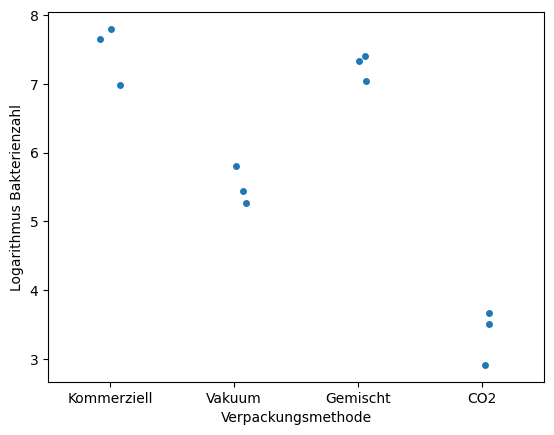

In [7]:
# Beispiel Fleischverpackung

meat = DataFrame({
    "Treatment": np.repeat(["Kommerziell","Vakuum","Gemischt","CO2"], [3, 3, 3, 3]),
    "meat_id":[7.66, 6.98, 7.80, 5.26, 5.44, 5.80, 7.41, 7.33, 7.04, 3.51, 2.91, 3.66]
})

sns.stripplot(x="Treatment", y="meat_id", data=meat) 
plt.xlabel("Verpackungsmethode") 
plt.ylabel("Logarithmus Bakterienzahl")

plt.show()


In [14]:
fit = ols("meat_id ~ Treatment",data=meat).fit()
fit.params

# intercept ist bereits der mittelweerrt für die CO2-Gruppe
# Mittelwert für Gemischt = Intercept + Treatment[Gemischt]



Intercept                   3.36
Treatment[T.Gemischt]       3.90
Treatment[T.Kommerziell]    4.12
Treatment[T.Vakuum]         2.14
dtype: float64

In [15]:
fit_pred = fit.get_prediction()
(fit_pred.conf_int())[0]

array([7.02684427, 7.93315573])

# Anova Test: